In [9]:
import importlib
import analysiscn
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysiscn)

pd.options.mode.copy_on_write = True

df = analysiscn.read_experiments([
  "../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
  # "../campaign/iris-hopper/turbo.gpu.release-v1.2.9-mzn2024.csv"
])

mzn_challenge = pd.read_csv("../benchmarking/mzn2024.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Remove instances that might have been solved during flattening
df = df[~(df['preprocessing_time'].isna())]

# Print the number of rows
print(f"Number of instances (not solved during flattening): {df.shape[0]}")


../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv : Number of erroneous rows:  1
../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv 63    ../data/mzn-challenge/2024/yumi-dynamic/p_9_GS...
Name: data_file, dtype: object
Number of instances (not solved during flattening): 98


#### Preprocessing Time Analysis

average_preprocessing_time=17.29
median_preprocessing_time=0.97
stddev_preprocessing_time=50.60
max_preprocessing_time=281.11


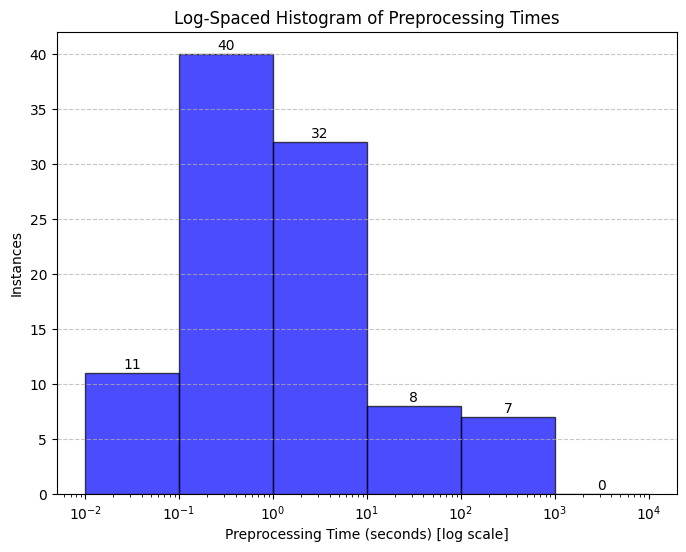

In [10]:

analysiscn.preprocessing_time_distribution(df)

#### TCN Operator Usage Heatmap

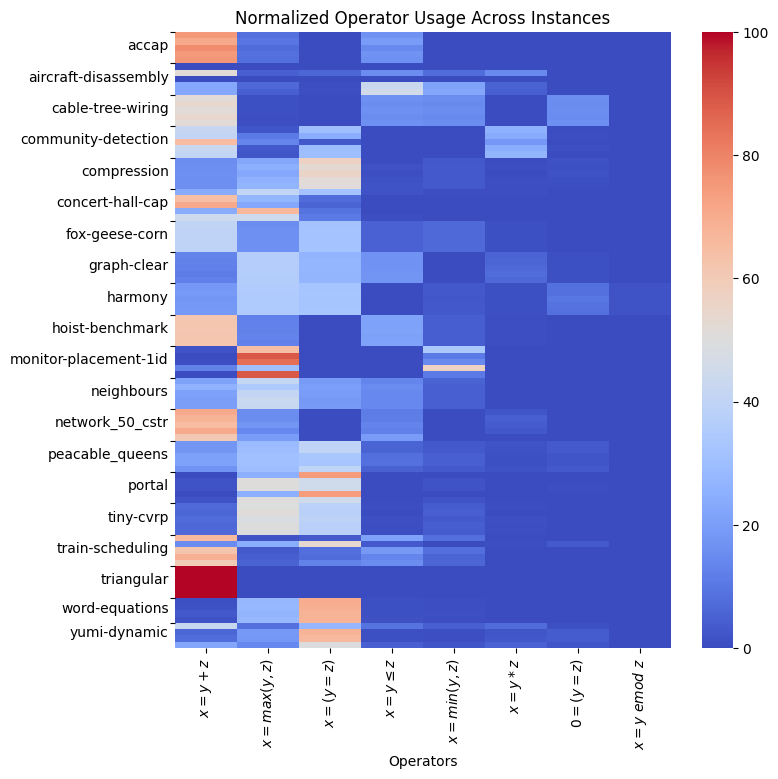

In [11]:

analysiscn.heatmap_operators(df)

#### Cost of TCN Network

Number of instances not solved during preprocessing: 96
average_vars_increase=8.78
average_cons_increase=24.62
max_vars_increase=111.62
max_cons_increase=525.40
median_vars_increase=1.74
median_cons_increase=2.97
stddev_vars_increase=18.41
stddev_cons_increase=69.88
leq_10x_increase=68
leq_100x_increase=87


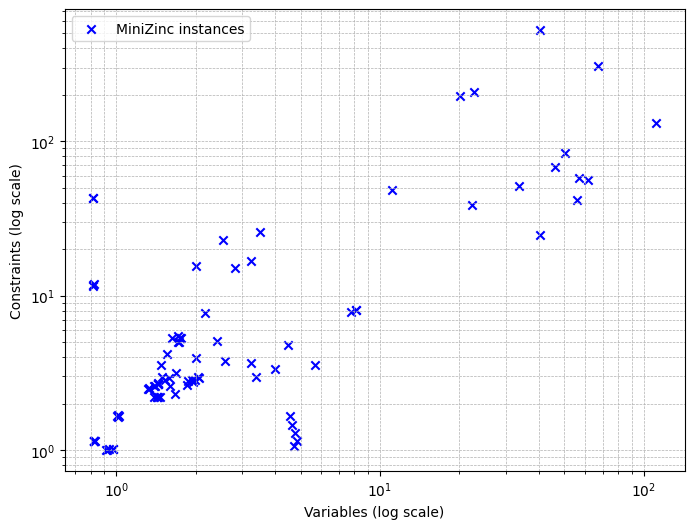

average_vars_increase=23.42
average_cons_increase=37.75
max_vars_increase=336.28
max_cons_increase=731.63
median_vars_increase=4.45
median_cons_increase=4.34
stddev_vars_increase=50.74
stddev_cons_increase=115.71
leq_10x_increase=56
leq_100x_increase=84


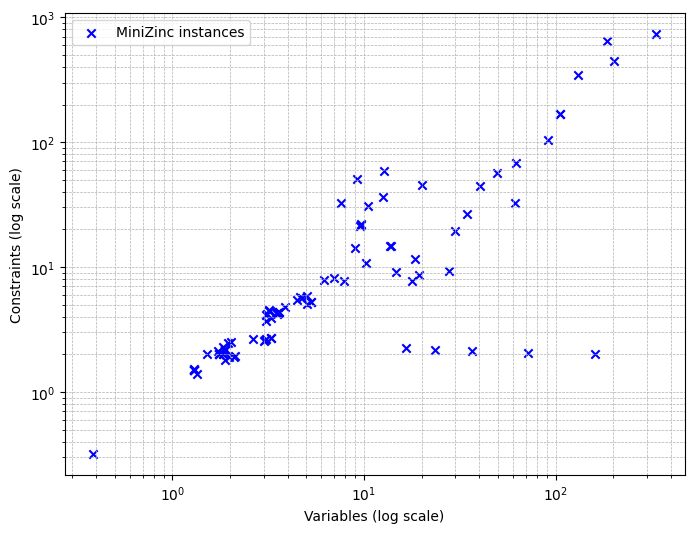

In [12]:

df = df[(df['variables_after_simplification'] > 0) & (df['constraints_after_simplification'] > 0)]
print(f"Number of instances not solved during preprocessing: {df.shape[0]}")

choco = analysiscn.read_experiments([
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
])
choco = choco[choco['model_data_file'].isin(mzn_data)]
choco = choco.drop_duplicates(subset='model_data_file', keep='last')
choco.rename(columns={'variables': 'choco_vars', 'constraints': 'choco_cons'}, inplace=True)
df = df.merge(choco[['model_data_file', 'choco_vars', 'choco_cons']], on='model_data_file', how='left')

df = df[df['problem'] != 'yumi-dynamic']
# df = df[df['problem'] != 'concert-hall-cap']
# df = df[df['problem'] != 'monitor-placement-1id']

print_table_problem = False

analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints', print_table_problem)
# analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')
# analysiscn.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints','variables_after_simplification', 'constraints_after_simplification')

#### Backtracking Analysis

In [13]:
# print("WORDPRESS 7")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/wordpress7_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)
# print("ACCAP 4")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/accap4_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)
# print("GFD N55")
# print("===========\n")
# df = pd.read_csv("~/repositories/lattice-land/turbo/gfdn55_ac1_backtrack_analysis.csv")
# analysis.analyze_fp_iterations_on_backtrack(df)